In [3]:

import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 


import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [110]:
df = pd.read_csv("유성구 업종별 소비금액 (1).csv", encoding='CP949')

df["year"]=df["year"].astype(str)
df["month"]=df["month"].astype(str)

for i in range(2,3):
    df['month'+str(i)] = df["month"].astype('str').str.zfill(i) # 1~9월까지 0을 채워서 두 자리까지..

df["date"] = df["year"] + df["month2"] #컬럼 두 개 합치기 = 2xxx0x 형태로 만들기

df['date']=df['date'].apply(lambda _ : datetime.strptime(_,'%Y%m'))


In [113]:
df1 = pd.read_csv("지역화폐 업종별 소비금액 (2).csv", encoding='CP949')

df1["year"]=df1["year"].astype(str)
df1["month"]=df1["month"].astype(str)

for i in range(2,3):
    df1['month'+str(i)] = df1["month"].astype('str').str.zfill(i) # 1~9월까지 0을 채워서 두 자리까지..
    
df1["date"] = df1["year"] + df1["month2"] #컬럼 두 개 합치기 = 2xxx0x 형태로 만들기

# df1['date'] = df1['date'].apply(lambda _ : datetime.strptime(_,'%Y%m'))
df1['date'] = pd.to_datetime(df['date'])

In [114]:
 pd.unique(df["date"])

array(['2022-01-01T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-03-01T00:00:00.000000000', '2022-04-01T00:00:00.000000000',
       '2022-05-01T00:00:00.000000000', '2021-10-01T00:00:00.000000000',
       '2021-11-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [115]:
pd.unique(df1["date"])

array(['2022-01-01T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-03-01T00:00:00.000000000', '2022-04-01T00:00:00.000000000',
       '2022-05-01T00:00:00.000000000', '2021-10-01T00:00:00.000000000',
       '2021-11-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [116]:
df.head()

,year,month,dong,num,code,name,cost,Name,month2,date
0,2022,1,가정동,71,G,도매 및 소매업(45-47),139056700,도매,01,2022-01-01
1,2022,1,가정동,83,S,협회 및 단체 수리 및 기타 개인 서비스업(94-96),11294100,협회,01,2022-01-01
2,2022,1,가정동,67,C,제조업(10-34),34390500,제조업,01,2022-01-01
3,2022,1,가정동,73,I,숙박 및 음식점업(55-56),268942300,숙박,01,2022-01-01
4,2022,1,가정동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),1594500,사업시설,01,2022-01-01


In [ ]:
list = list = ['G', 'S', 'C', 'I', 'N', 'P', 'Q', 'L', 'R', 'J', 'O', 'H','M']


In [192]:
R = df[(df["code"] == 'R')]
J = df[(df["code"] == 'J')]
H = df[(df["code"] == 'H')] #예술
print(R.head())


    year month dong  num code                        name       cost Name  \
17  2022     1  계산동   82    R  예술  스포츠 및 여가관련 서비스업(90-91)   79427000   예술   
31  2022     1  관평동   82    R  예술  스포츠 및 여가관련 서비스업(90-91)  196681600   예술   
35  2022     1  교촌동   82    R  예술  스포츠 및 여가관련 서비스업(90-91)     632300   예술   
56  2022     1  구암동   82    R  예술  스포츠 및 여가관련 서비스업(90-91)  106542500   예술   
62  2022     1   궁동   82    R  예술  스포츠 및 여가관련 서비스업(90-91)  237736600   예술   

   month2       date  
17     01 2022-01-01  
31     01 2022-01-01  
35     01 2022-01-01  
56     01 2022-01-01  
62     01 2022-01-01  


In [193]:
R = R.groupby('date').sum()
J = J.groupby('date').sum()
H = H.groupby('date').sum()

In [119]:
R

,num,cost
date,,
2021-10-01,2378,6870068400
2021-11-01,2460,6316274300
2021-12-01,2378,5224184900
2022-01-01,2542,4449256600
2022-02-01,2378,4310911100
2022-03-01,2378,6449363000
2022-04-01,2378,7080105600
2022-05-01,2460,7779661900


## df1 뽑기

In [120]:
df1.head()

,year,month,dong,num,code,name,count,cost,Name,month2,date
0,2021,10,원내동,67,C,제조업(10-34),300.00,583.36,제조업,10,2022-01-01
1,2021,10,원내동,71,G,도매 및 소매업(45-47),19398.94,22475.86,도매,10,2022-01-01
2,2021,10,원내동,73,I,숙박 및 음식점업(55-56),10338.46,10408.65,숙박,10,2022-01-01
3,2021,10,원내동,77,M,전문 과학 및 기술 서비스업(70-73),150.00,172.21,전문,10,2022-01-01
4,2021,10,원내동,78,N,사업시설 관리 사업 지원 및 임대 서비스업(74-76),50.00,208.44,사업시설,10,2022-01-01


In [121]:
r = df1[(df1["code"] == 'R')]
j = df1[(df1["code"] == 'J')]
h = df1[(df1["code"] == 'H')] #예술

In [145]:
r = r.groupby("date").sum()
j = r.groupby("date").sum()
h = r.groupby("date").sum()

In [146]:
r

,num,count,cost
date,,,
2021-10-01,2378,66042.60,19301.16
2021-11-01,2542,65316.46,18941.69
2021-12-01,1722,52063.12,14756.60
2022-01-01,2378,89375.49,29960.66
2022-02-01,2542,118632.17,46595.11
2022-03-01,2378,67670.87,31842.08
2022-04-01,2460,62516.11,18269.31
2022-05-01,2460,58591.87,13437.10


In [147]:
R

,num,cost
date,,
2021-10-01,2378,6870068400
2021-11-01,2460,6316274300
2021-12-01,2378,5224184900
2022-01-01,2542,4449256600
2022-02-01,2378,4310911100
2022-03-01,2378,6449363000
2022-04-01,2378,7080105600
2022-05-01,2460,7779661900


# 정규화 Z-score & Min-Max

In [206]:
import scipy.stats as ss

data_standadized_R = ss.zscore(R["cost"])
data_standadized_r = ss.zscore(r["cost"])

data_standadized_J = ss.zscore(J["cost"])
data_standadized_j = ss.zscore(j["cost"])

data_standadized_H = ss.zscore(H["cost"])
data_standadized_h = ss.zscore(h["cost"])


In [207]:
Rr = pd.DataFrame({'R' : R['cost'], 'r' : r['cost'] })

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(Rr)

RRR =pd.DataFrame(df_minmax, columns = ['R', 'r'])

RRR

,R,r
0,0.737775,0.176852
1,0.578123,0.166011
2,0.263286,0.039794
3,0.039883,0.498328
4,0.000000,1.000000
5,0.616490,0.555069
6,0.798326,0.145733
7,1.000000,0.000000


In [196]:
Jj = pd.DataFrame({'J' : J['cost'], 'j' : j['cost'] })

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(Rr)

JJJ = pd.DataFrame(df_minmax, columns = ['J', 'j'])

JJJ

,J,j
0,0.737775,0.176852
1,0.578123,0.166011
2,0.263286,0.039794
3,0.039883,0.498328
4,0.000000,1.000000
5,0.616490,0.555069
6,0.798326,0.145733
7,1.000000,0.000000


In [167]:
Hh = pd.DataFrame({'H' : H['cost'], 'h' : h['cost'] })

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(Rr)

HHH = pd.DataFrame(df_minmax, columns = ['H', 'h'])
HHH

,H,h
0,0.120634,0.176852
1,1.000000,0.166011
2,0.969618,0.039794
3,0.546349,0.498328
4,0.000000,1.000000
5,0.338322,0.555069
6,0.621646,0.145733
7,0.970028,0.000000


# 산점도 (상관성 시각화)

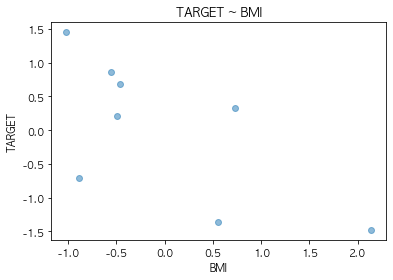

In [150]:
# # z 스코어
# X = data_standadized_r
# Y = data_standadized_R

# import matplotlib.pyplot as plt
# plt.scatter(X, Y, alpha=0.5)
# plt.title('TARGET ~ BMI')
# plt.xlabel('BMI')
# plt.ylabel('TARGET')
# plt.show()


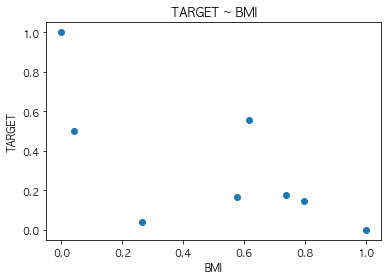

In [186]:
# mimmax

X = RRR["R"]
Y = RRR["r"]

import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.title('TARGET ~ BMI')
plt.xlabel('BMI')
plt.ylabel('TARGET')
plt.show()

In [174]:
import scipy.stats as stats
stats.pearsonr(X,Y)

# 업종 C

(-0.6768549817974259, 0.0652353535768578)

In [200]:
# z스코어
#X = data_standadized_J
# Y = data_standadized_j

# import matplotlib.pyplot as plt
# plt.scatter(X, Y, alpha=0.5)
# plt.title('Nor_R')
# plt.xlabel('Nor_r')
# plt.ylabel('TARGET')
# plt.show()

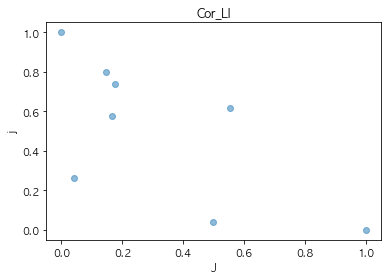

In [202]:
#mimmax

X = LLL["L"]
Y = lll["l"]

import matplotlib.pyplot as plt
plt.scatter(X, Y, alpha=0.5)
plt.title('Cor_Ll')
plt.xlabel('L')
plt.ylabel('l')
plt.show()

In [185]:
import scipy.stats as stats
stats.pearsonr(X,Y)

#업종 L

(-0.7448831750940088, 0.03397318286089964)

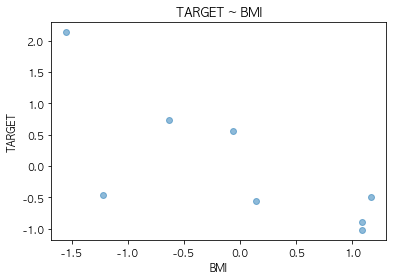

In [152]:
# X = data_standadized_H
# Y = data_standadized_h

# import matplotlib.pyplot as plt
# plt.scatter(X, Y, alpha=0.5)
# plt.title('TARGET ~ BMI')
# plt.xlabel('BMI')
# plt.ylabel('TARGET')
# plt.show()

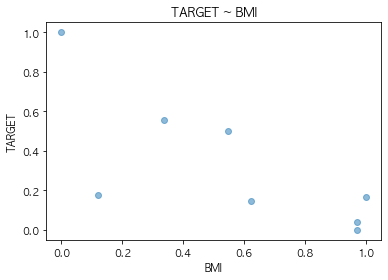

In [180]:
#mimmax

X = HHH["H"]
Y = HHH["h"]

import matplotlib.pyplot as plt
plt.scatter(X, Y, alpha=0.5)
plt.title('TARGET ~ BMI')
plt.xlabel('BMI')
plt.ylabel('TARGET')
plt.show()

In [181]:
import scipy.stats as stats
stats.pearsonr(X,Y)

(-0.7448831750940088, 0.03397318286089964)

In [ ]:
X = 
Y = 

In [ ]:
import scipy.stats as stats
stats.pearsonr(X,Y)

In [ ]:
df = pd.DataFrame({"v1":[100,200,300,400], "v2":[400,200,100,250]})